In [309]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# CARREGANDO AS BASES DE DADOS

In [310]:
df1 = pd.read_csv('DataBase.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [311]:
df2 = pd.read_csv('ExtraInfo.csv')
df2.head()

,PassengerId,Survived
0,892,NaN
1,893,1.0
2,894,NaN
3,895,NaN
4,896,NaN


# UNINDO AS BASES DE DADOS
Vemos que as duas bases de dados tem uma coluna em comum que é "PassengerId", então para trabalhar com apenas um Data Frame, vamos juntar as duas tabelas em uma só, e organizar as linhas a partir dessa coluna em comum

In [312]:
df = pd.merge(df1, df2, on='PassengerId')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


- Deletando todas as linhas (0) colunas (1) em que todos os elementos são nulos 

In [313]:
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')
df['Survived'].fillna(0, inplace=True) # SUBSTITUINDO TODOS OS ELEMENTOS NULOS POR 0

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


# HISTOGRAMA
Criando um gráfico de frequência para examinar quais são as idades mais populosas (que possuem maior frequência)

Text(0.5, 1.0, 'Idade x Contagem')

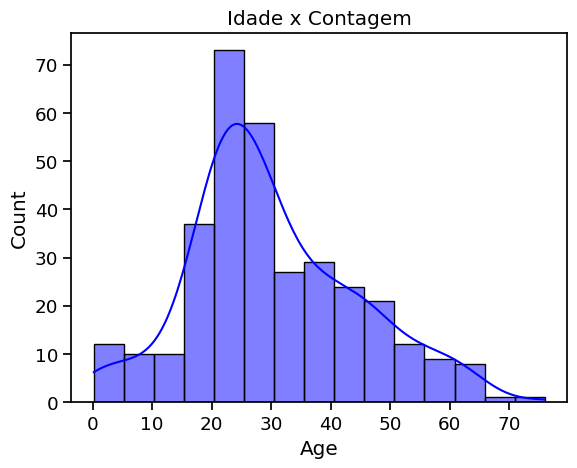

In [315]:
sns.histplot(df['Age'], color='blue', kde=True)
plt.title('Idade x Contagem')

- Vemos que as idades mais frequentes se encontram entre 15 e 50 anos. Agora, vamos pegar as idades e categorizar pelo sexo, ou seja, vamos ver como as idades se concentram, visualizando qual é o sexo mais frequente

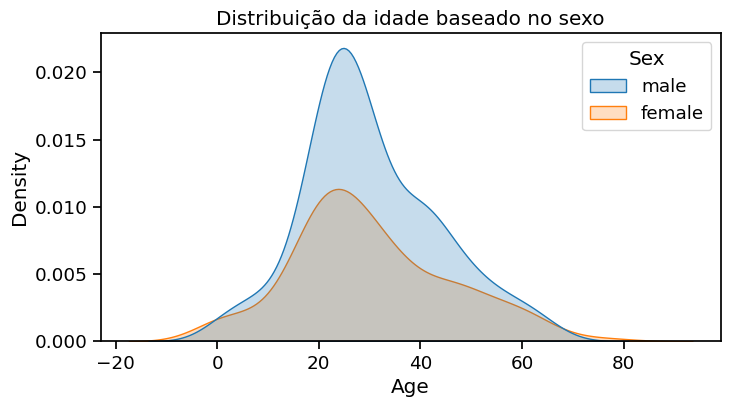

In [316]:
sns.set_context('notebook', font_scale= 1.2)
plt.figure(figsize=(8, 4))

ax = sns.kdeplot(data=df, x='Age', hue='Sex', fill=True)
plt.title('Distribuição da idade baseado no sexo')

plt.show()

- Isso mostra que a maior parte da tripulação se concentrava entre 15 e 50 anos, e a maior parte era homem. A função groupby abaixo mostra que 75% das idades estão abaixo ou iguais a 39 anos, e os 25% restantes estão acima disso

In [317]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,127.0,30.272362,15.428613,0.17,20.5,27.0,38.5,76.0
male,205.0,30.272732,13.389528,0.33,22.0,27.0,40.0,67.0


- Vamos agora analisar como as classes do navio se distribuem, categorizado por "survived", ou seja, vamos ver qual é a taxa de sobrevivência dos tripulantes pela sua classe

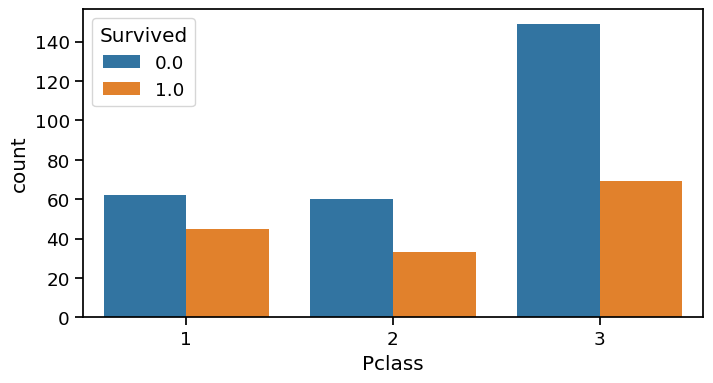

In [318]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

- Vemos que a classe que mais sobreviveu foi a 3, mas também foi a que mais morreu

# RELAÇÃO ENTRE DADOS CATEGÓRICOS
O nosso alvo é a coluna "Survived", ou seja, quem sobreviveu ao evento. Como essa coluna é categórica, precisamos tratar os dados de forma categórica

- Encontrando a relação de cada coluna com "Survived"

In [319]:
for coluna in df.columns:
    grafico = px.histogram(df, x=coluna, color='Survived', histnorm='percent', width=700, height=400)
    grafico.update_traces(marker_line_width=1, marker_line_color="black")
    grafico.show()

- Dos gráficos acima podemos concluir que o sexo masculino morreu muito mais, podemos confirmar isso com: 

In [320]:
totalMales   = (df['Sex'] == 'male').sum() 
totalFemales = (df['Sex'] == 'female').sum()

survivedMales   = ((df['Sex'] == 'male')   & (df['Survived'] == 1)).sum()
survivedFemales = ((df['Sex'] == 'female') & (df['Survived'] == 1)).sum()

print(f'{int(survivedMales/totalMales * 100)}%     dos homens sobreviveram')
print(f'{int(survivedFemales/totalFemales * 100)}% das mulheres sobreviveram')

3%     dos homens sobreviveram
90% das mulheres sobreviveram


# PREVENDO VALORES - DADOS NUMÉRICOS
Trabalha só com valores numéricos, vamos converter string para float

In [321]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

- Verificando quais são os valores categóricos e eliminando todas as linhas em que pelo menos 1 elemento é nulo (nada pode ser nulo para o machine leaning funcionar)

In [322]:
print(df['Sex'].unique())
print(df['Embarked'].unique())

df = df.dropna(axis=0, how='any')

['male' 'female']
['Q' 'S' 'C']


In [323]:
def convertNumeric1(dado):
    if dado == 'male':
        return 0
    if dado == 'female':
        return 1
    
def convertNumeric2(dado):
    if dado == 'Q':
        return 1
    if dado == 'C':
        return 2
    if dado == 'S':
        return 3

df['Sex'] = df['Sex'].apply(convertNumeric1)
df['Embarked'] = df['Embarked'].apply(convertNumeric2)

In [324]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,3,0.0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,3,1.0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,2,1.0
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,2,1.0
28,920,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,3,0.0


In [325]:
xDados = df[['Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
yDados = df['Survived']

xTreino, xTeste, yTreino, yTeste = train_test_split(xDados, yDados, test_size=0.25)

In [326]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(xTreino, yTreino)

KNeighborsClassifier(n_neighbors=1)

In [327]:
def predictKNN(x, columns, KNN):
    return KNN.predict(pd.DataFrame([x], columns=columns))[0]

predictKNN([1, 24, 1, 2,  65, 3], xDados.columns, KNN)

1.0

# EFICIÊNCIA DA PREVISÃO

In [328]:
yTeste = KNN.predict(xDados)
df['Predicted'] = yTeste

df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Predicted
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",1,23.0,1,0,21228,82.2667,B45,3,0.0,0.0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.0,1,0,W.E.P. 5734,61.1750,E31,3,1.0,1.0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,2,1.0,1.0
26,918,1,"Ostby, Miss. Helene Ragnhild",1,22.0,0,1,113509,61.9792,B36,2,1.0,1.0
28,920,1,"Brady, Mr. John Bertram",0,41.0,0,0,113054,30.5000,A21,3,0.0,0.0


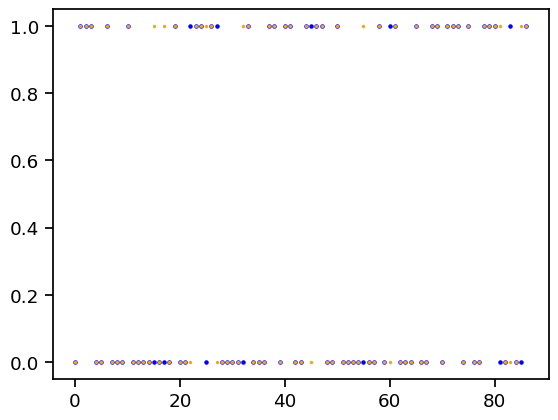

In [336]:
x  = list(range(len(df)))
y1 = df['Survived']
y2 = df['Predicted']

plt.scatter(x, y2, color='blue', label='Valores Treinados', s=5)
plt.scatter(x, y1, color='orange', label='Valores Originais', s=2)
plt.show()

- Verificando a precisão do modelo, vendo a porcentagem de valores em que a coluna 'Survived' difere da coluna 'Predicted', no mundo perfeito, a porcentagem seria 0, ou seja, nenhuma diferença entre o treino e teste

In [331]:
diferentes = np.array(df['Survived'] != df['Predicted'])
np.count_nonzero(diferentes)/len(df) * 100

13.793103448275861